# ¿Qué es el despliegue de modelos? 
Definiremos el despliegue de modelos como la transformación de un modelo en producto que puede ser utilizado como servicio por un tercero.

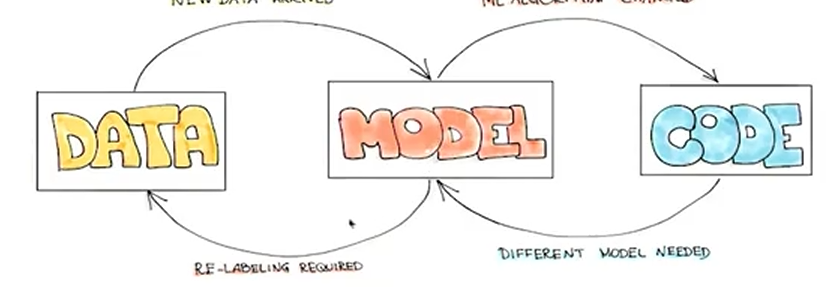


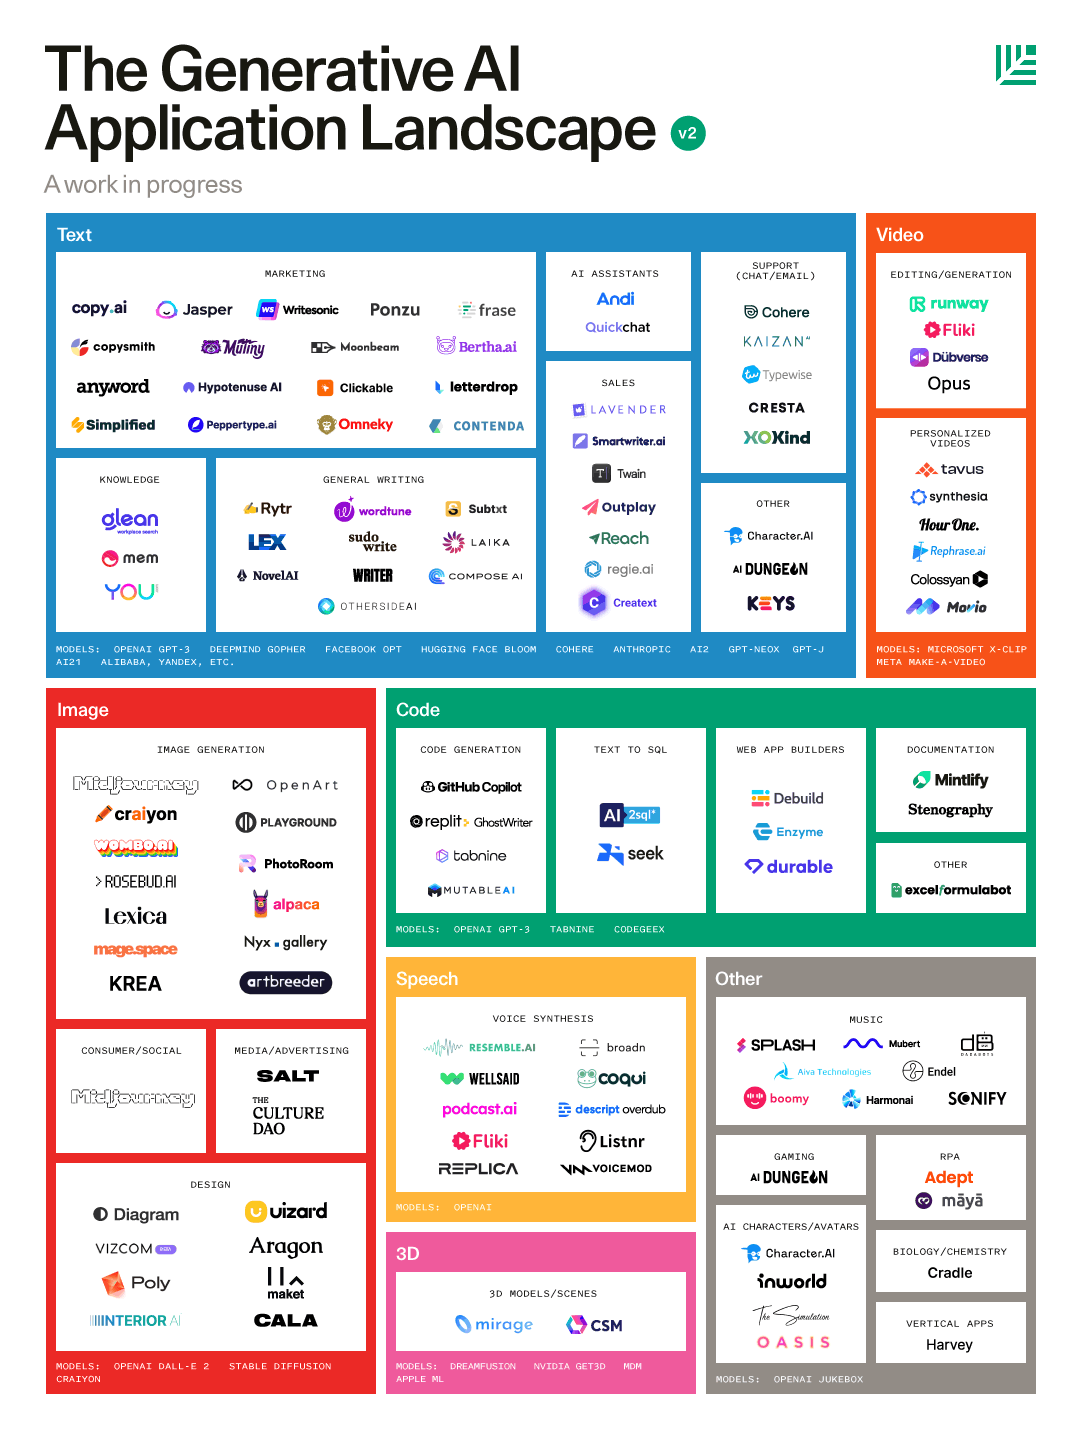

## Flujo de vida
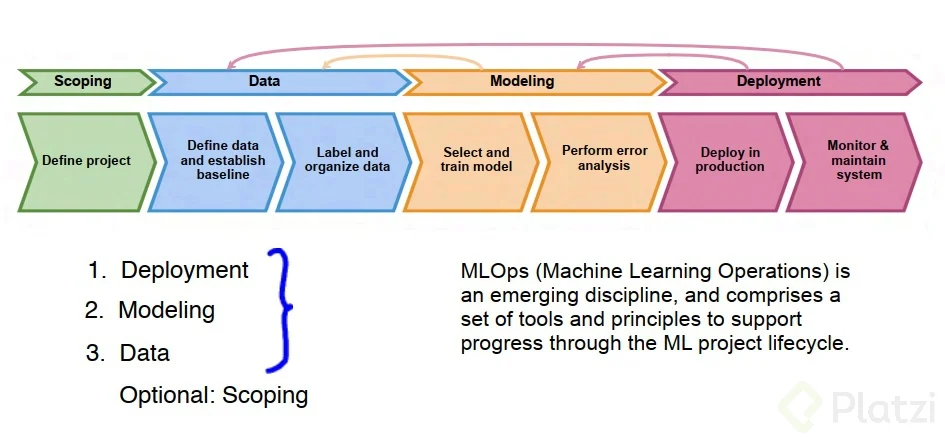
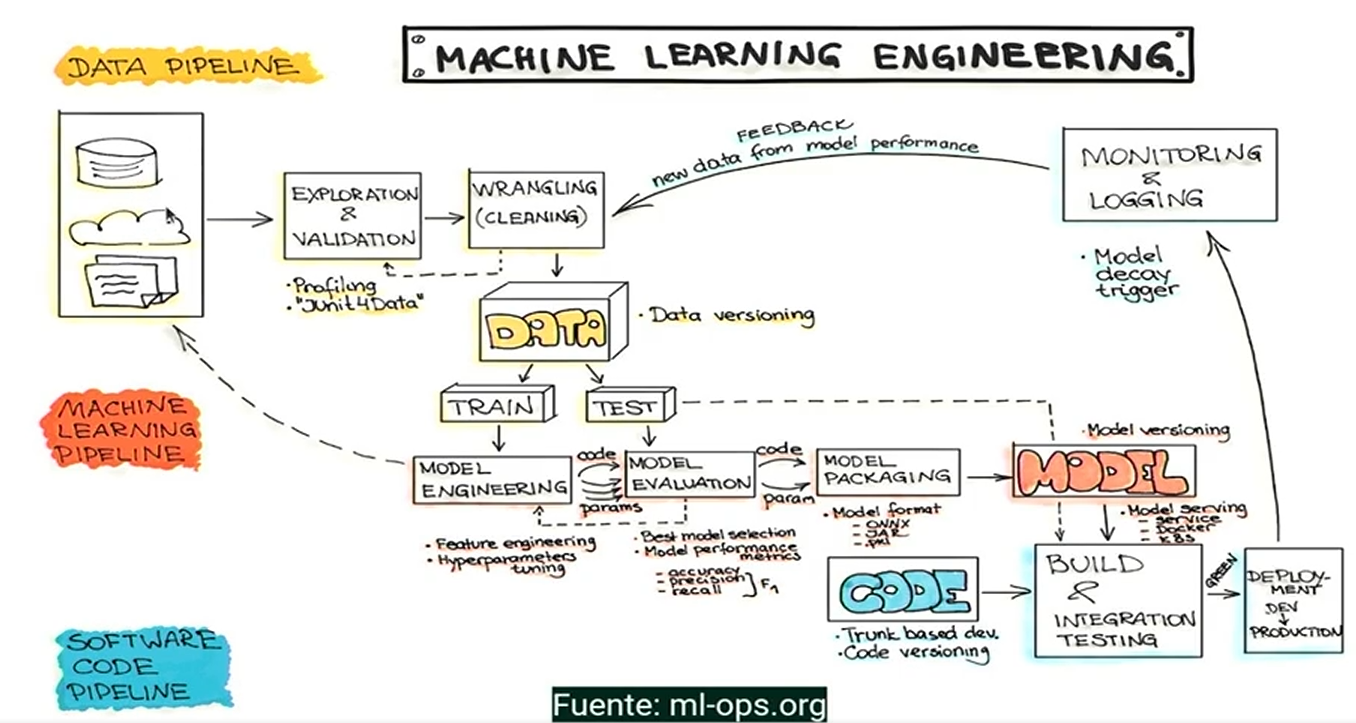

## Requerimientos

- Ingeniería de datos
  - Ingesta de datos
  - Manejo de datos
- Machine Learning Pipelines
  - Entrenamiento de modelo
  - Evaluación de modelo
  - Empaquetado y serialización de modelo
- Deployment pipelines
  - Servicio de modelo
  - Monitoreo del rendimiento del modelo


### Patrones de diseño para el model serving

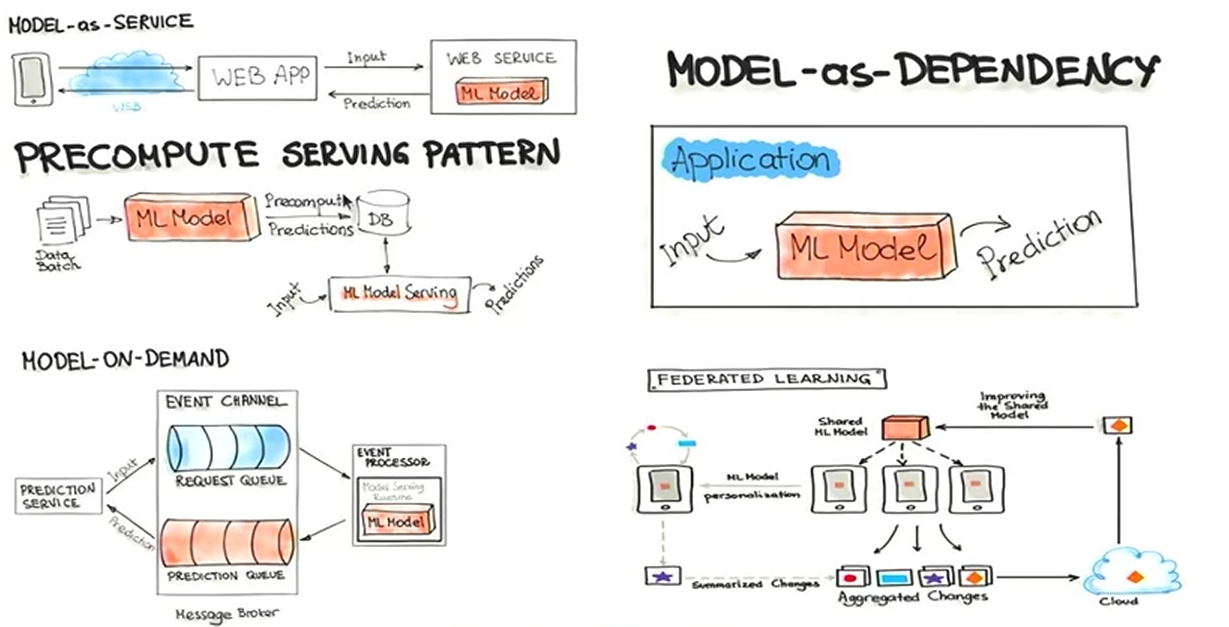

- Model-as-Service (será el que implementaremos en el curso): El modelo es un servicio que puede ser visitado por una request (por ejemplo vía protocolo http)

- Model-as-Depenency: El modelo está incrustado dentro de la dependencia que se está utilizando en la aplicación. Por lo que podría ser consumido llamando al atributo predict() y tener la inferencia

- Precompute Serving Pattern: El modelo ya existe y hace predicciones. Esas predicciones serán guardadas en bases de datos que serán visitadas con posterioridad

- Model-on-Demand: Se utiliza para arquitecturas en streaming. Tenemos el message broker que es el encargado del flujo entre envía los inputs para las predicciones desde los datos, y envía las predicciones hechas por el modelo al servicio que lo requiera.

- Federated Learning (o Hybrid Learning): Es un grupo de modelos. Se asigna un modelo por cada usuario que utilicé la aplicación, y sus datos son los que entrenarán al modelo que luego hará predicciones.
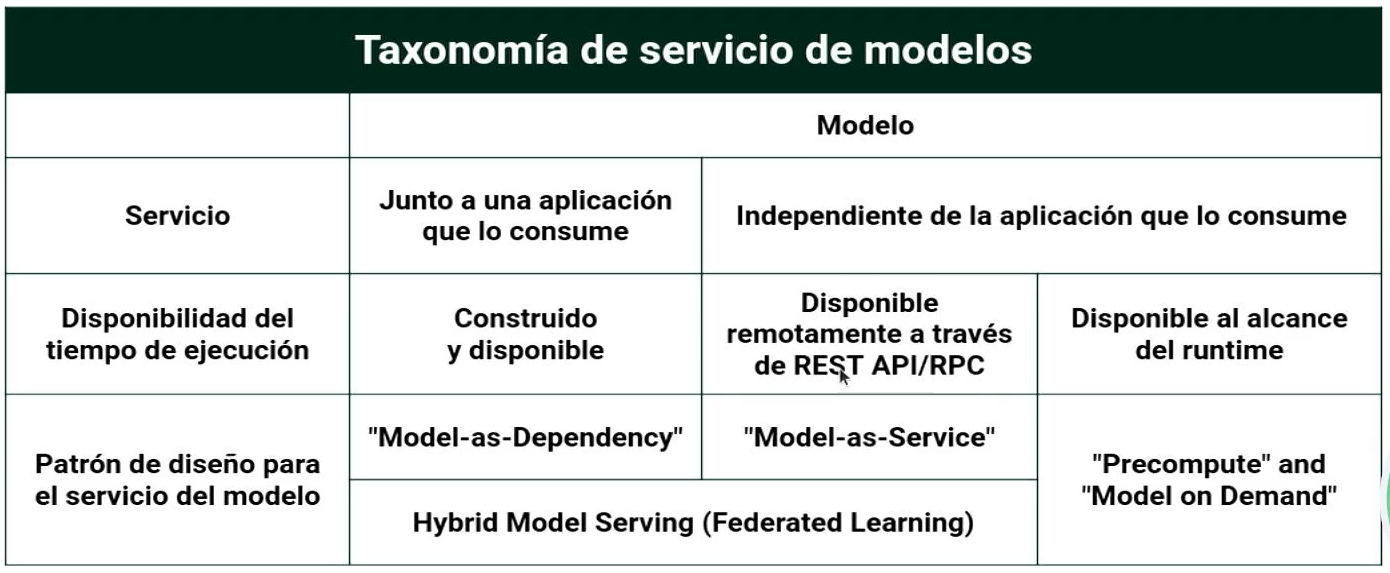

## Proyecto

Se busca predecir la cantidad de dinero aque genera una película a través de una API, con el fin de reproducir el flujo de puesta en producción de un modelo, aplicar entrenamiento continuo y desplegar continuamente.

### Arquitectura

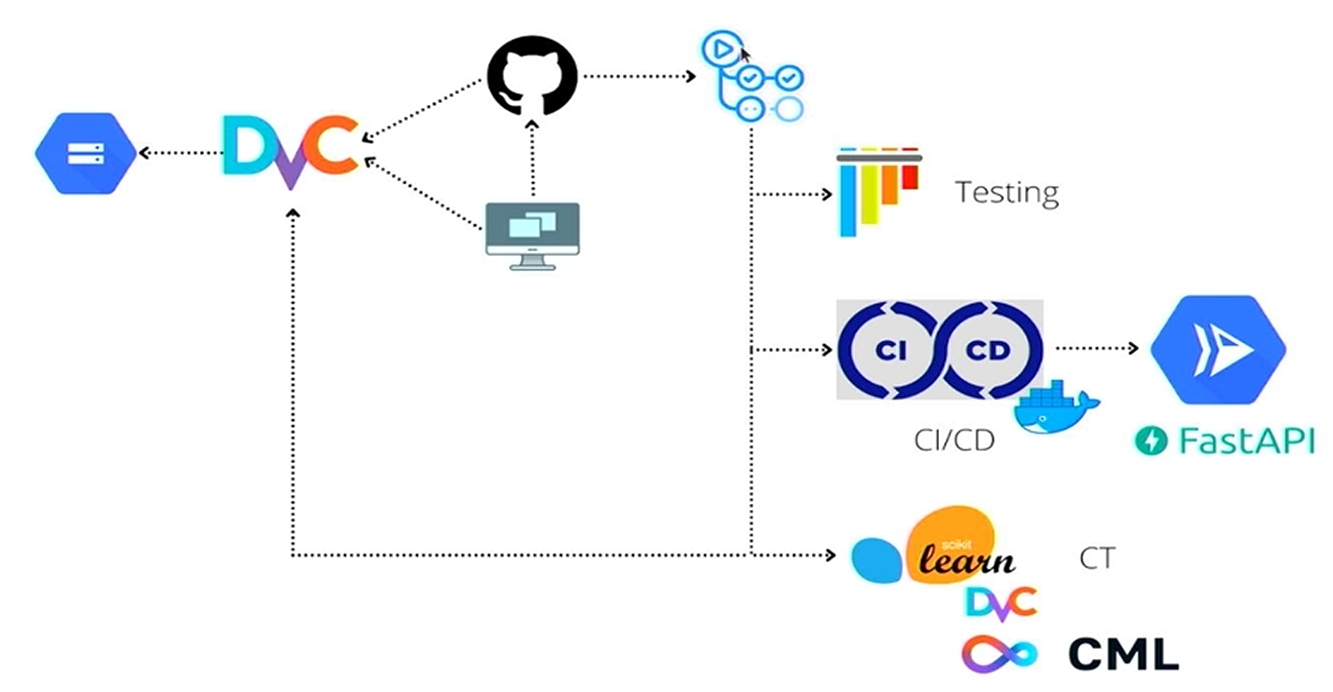

#### Distribución de archivos

- dvc/ <- configuraciones de DVC

- .github/workflows/ <- actions que se ejecutaran

- api/ <- API utilizando fast API

- dataset/ <- archivos del dataset traqueados

- model/ <- archivos de modelos traqueados

- notebooks/ <- notebooks con el modelo

- src/ <- archivos usados para reentrenamiento

- utilities/ <- archivos con utilidades especificas

- … <- archivos misceláneos del proyecto y extras que se necesitaran

##### DVC

En muchos proyectos tenemos un modelo.py (con el codigo python  del modelo) y un archivo modelo.pkl con el modelo empaquetado. git queda tiene problemas al tratar con archivos pesados como el .pkl así que DVC simplemente crea un archivo que referencia al modelo (model.pkl.dvc), el cual no pesa prácticamente nada.

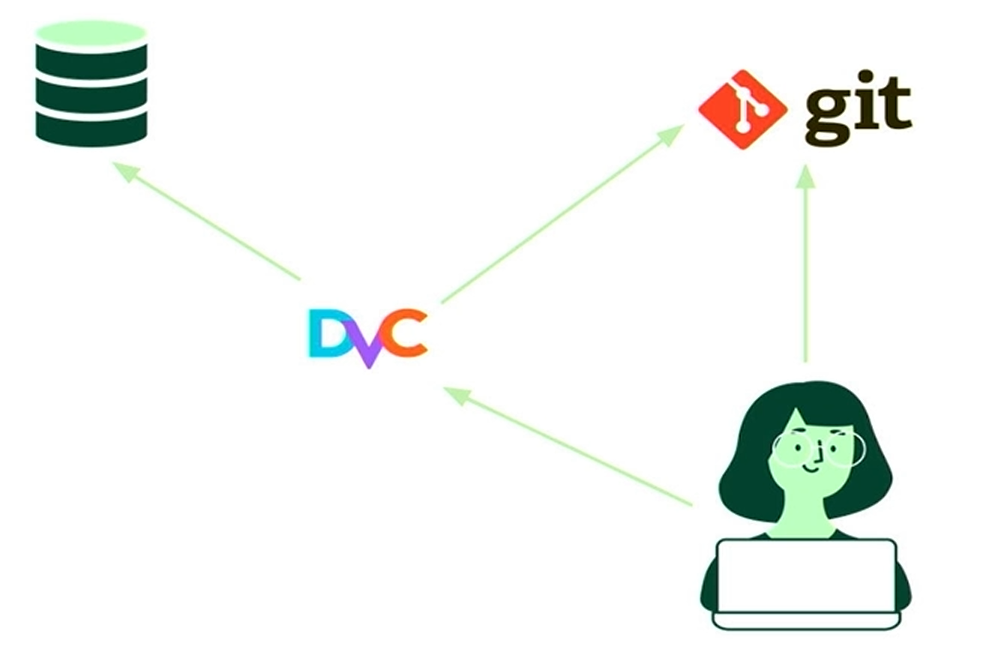

Entonces versionaremos este model.pkl.dvc y train.py en git, mientras dvc se encarga de versionar el model.pkl (que pesa 500mb!) guardándolo en un almacenamiento de la nube. Lo mismo podríamos hacer con datasets.

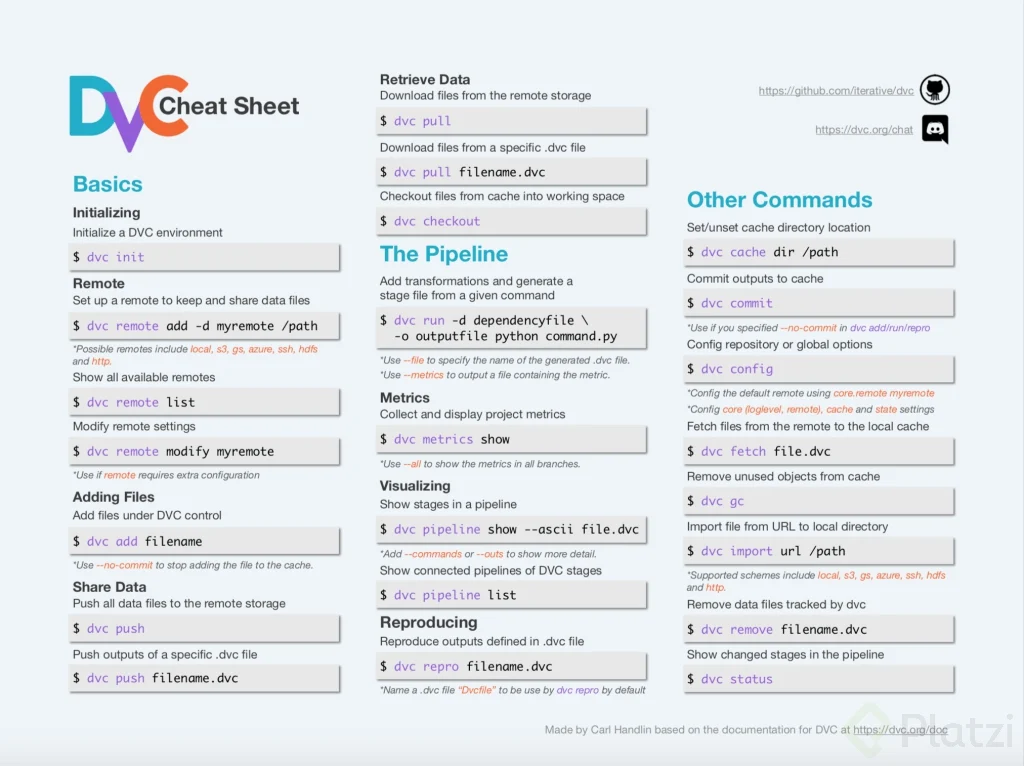